In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/twitter_training.csv')

In [ ]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.drop(columns = ['2401'], inplace = True)

In [ ]:
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.columns

Index(['Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [ ]:
df.rename(columns = {'Borderlands' : 'Game_Name',
                     'Positive' : 'Sentiment',
                     'im getting on borderlands and i will murder you all ,' : 'tweet'}, inplace = True)

In [ ]:
df.head()

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.isna().sum()

,0
Game_Name,0
Sentiment,0
tweet,554


In [ ]:
df.shape

(60954, 3)

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

,0
Game_Name,0
Sentiment,0
tweet,0


In [ ]:
df.Sentiment.value_counts()

,count
Sentiment,
Negative,17497
Positive,17080
Neutral,14491
Irrelevant,11332


In [ ]:
df_positive = df[df.Sentiment == 'Positive'].iloc[:2000]
df_negative = df[df.Sentiment == 'Negative'].iloc[:2000]
df_neutral = df[df.Sentiment == 'Neutral'].iloc[:2000]
df_irr = df[df.Sentiment == 'Irrelevant'].iloc[:2000]

In [ ]:
df2 = pd.concat([df_positive, df_negative, df_neutral, df_irr], axis = 0)

In [ ]:
df2.shape

(8000, 3)

In [ ]:
df2.Sentiment.value_counts()

,count
Sentiment,
Positive,2000
Negative,2000
Neutral,2000
Irrelevant,2000


In [ ]:
df2.head()

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df2.Game_Name.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)'], dtype=object)

In [ ]:
game_df = (pd.get_dummies(df2['Game_Name'])).astype('int')

In [ ]:
game_df

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
10628,0,0,0,0,1
10629,0,0,0,0,1
10630,0,0,0,0,1
10631,0,0,0,0,1


In [ ]:
df2.drop(columns = ['Game_Name'], inplace = True)

In [ ]:
df2.head()

,Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
df2.shape, game_df.shape

((8000, 2), (8000, 5))

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [ ]:
df2['lemma'] = df2['tweet'].apply(lemmatization)

In [ ]:
df2.head()

,Sentiment,tweet,lemma
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,"
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,"
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...


In [ ]:
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
  return ' '.join(no_stopwords)

In [ ]:
df2['final'] = df2['lemma'].apply(remove_stopwords)

In [ ]:
df2.head()

,Sentiment,tweet,lemma,final
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,",come border kill
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,",m borderland kill
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...,m come borderland murder
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...,m borderland 2 murder
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...,m borderland murder


In [ ]:
df2.drop(columns = ['tweet', 'lemma'], inplace = True)

In [ ]:
df2.head()

,Sentiment,final
0,Positive,come border kill
1,Positive,m borderland kill
2,Positive,m come borderland murder
3,Positive,m borderland 2 murder
4,Positive,m borderland murder


In [ ]:
sentiment_df = pd.concat([df2, game_df], axis = 1)

In [ ]:
sentiment_df.head()

,Sentiment,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,Positive,come border kill,0,1,0,0,0
1,Positive,m borderland kill,0,1,0,0,0
2,Positive,m come borderland murder,0,1,0,0,0
3,Positive,m borderland 2 murder,0,1,0,0,0
4,Positive,m borderland murder,0,1,0,0,0


In [ ]:
df2.shape

(8000, 2)

In [ ]:
df2.isna().sum()

,0
Sentiment,0
final,0


In [ ]:
X = sentiment_df.drop(columns = ['Sentiment'])
y = sentiment_df['Sentiment']

In [ ]:
X.head()

,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,come border kill,0,1,0,0,0
1,m borderland kill,0,1,0,0,0
2,m come borderland murder,0,1,0,0,0
3,m borderland 2 murder,0,1,0,0,0
4,m borderland murder,0,1,0,0,0


In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf.fit(X['final'])

TfidfVectorizer()

In [ ]:
tfidf_matrix = tfidf.transform(X['final']).toarray()

In [ ]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vectorizer_df = pd.DataFrame(tfidf_matrix, columns = tfidf.get_feature_names_out())

In [ ]:
vectorizer_df.head()

,00,000,01,02,03,03573057,0359873057,04,05,06,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.drop(columns = ['final'], inplace = True)

In [ ]:
X.shape, vectorizer_df.shape

((8000, 5), (8000, 6705))

In [ ]:
X = pd.concat([X, vectorizer_df], axis = 1)

In [ ]:
X.head()

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries),00,000,01,02,03,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.isna().sum()

,0
Amazon,952
Borderlands,952
CallOfDutyBlackopsColdWar,952
Overwatch,952
Xbox(Xseries),952
...,...
сетью,952
третьарце,952
اللعبه,952
حبيت,952


In [ ]:
X = X.fillna(0)

In [ ]:
X.isna().sum()

,0
Amazon,0
Borderlands,0
CallOfDutyBlackopsColdWar,0
Overwatch,0
Xbox(Xseries),0
...,...
сетью,0
третьарце,0
اللعبه,0
حبيت,0


In [ ]:
X.shape, y.shape

((8952, 6710), (8000,))

In [ ]:
X = X.iloc[:8000]

In [ ]:
X.shape, y.shape

((8000, 6710), (8000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((6400, 6710), (1600, 6710))

In [ ]:
model = RandomForestClassifier(n_jobs = 1,
                               random_state = 42,
                               n_estimators = 200)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [ ]:
pred = model.predict(X_test)

In [ ]:
y_test[:5]

,Sentiment
1246,Negative
2892,Negative
4073,Positive
4786,Negative
1263,Neutral


In [ ]:
pred[:5]

array(['Irrelevant', 'Irrelevant', 'Irrelevant', 'Neutral', 'Positive'],
      dtype=object)

In [ ]:
accuracy_score(y_test, pred) * 100

70.9375

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  Irrelevant       0.74      0.72      0.73       399
    Negative       0.70      0.58      0.64       379
     Neutral       0.71      0.73      0.72       397
    Positive       0.69      0.79      0.74       425

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600



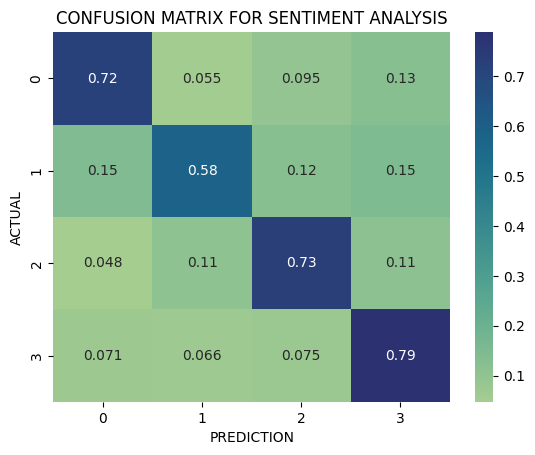

In [ ]:
cf = confusion_matrix(y_test, pred, normalize = 'true')

sns.heatmap(cf, annot = True, cmap = 'crest');
plt.xlabel('PREDICTION');
plt.ylabel('ACTUAL');
plt.title('CONFUSION MATRIX FOR SENTIMENT ANALYSIS');